# EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/Groceries_dataset.csv")
#/content/gdrive/MyDrive/Groceries_dataset.csv

In [ ]:
data.shape

(38765, 3)

**The dataset has 38765 rows of the purchase orders of people from the grocery stores. These orders can be analysed and association rules can be generated using Market Basket Analysis by algorithms like Apriori Algorithm.**

In [ ]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
data.sort_values(by=['Date'])

,Member_number,Date,itemDescription
13581,4942,01-01-2014,butter
9557,1922,01-01-2014,tropical fruit
30568,3797,01-01-2014,whole milk
13449,2237,01-01-2014,bottled water
9172,2226,01-01-2014,sausage
...,...,...,...
3049,3122,31-10-2015,chicken
785,1981,31-10-2015,chicken
16087,1787,31-10-2015,chocolate
19198,3122,31-10-2015,bottled beer


In [ ]:
#data_eda = data.copy()
data_eda = pd.read_csv("/content/gdrive/MyDrive/Groceries_dataset.csv",index_col='Date', parse_dates=True)
data_eda.head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


In [ ]:
#Number of unique Costumers and Items
print(data_eda.Member_number.nunique())
print(data_eda.itemDescription.nunique())

3898
167


In [ ]:
#Creating new columns based on the date column
data_eda['year'] = data_eda.index.year
data_eda['month'] = data_eda.index.month
data_eda['day'] = data_eda.index.day
data_eda['weekday'] = data_eda.index.strftime('%A')
data_eda['monthName'] = data_eda.index.strftime('%B')
data_eda.head()

,Member_number,itemDescription,year,month,day,weekday,monthName
Date,,,,,,,
2015-07-21,1808,tropical fruit,2015,7,21,Tuesday,July
2015-05-01,2552,whole milk,2015,5,1,Friday,May
2015-09-19,2300,pip fruit,2015,9,19,Saturday,September
2015-12-12,1187,other vegetables,2015,12,12,Saturday,December
2015-01-02,3037,whole milk,2015,1,2,Friday,January


In [ ]:
data_eda['year'].value_counts()

2015    20488
2014    18277
Name: year, dtype: int64

Text(0.5, 1.0, 'Sales in months')

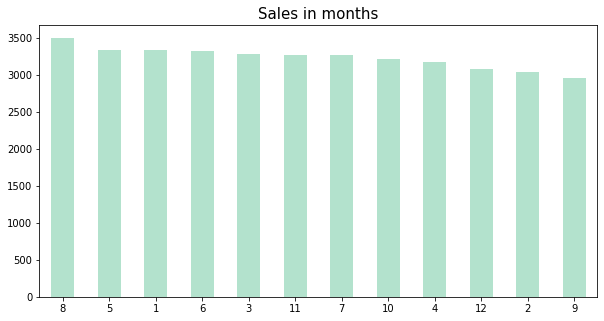

In [ ]:
plt.figure(figsize=(10, 5))
data_eda['month'].value_counts(sort=True).plot(kind='bar',rot=0,colormap='Pastel2')
plt.title('Sales in months', size=15)

Text(0.5, 1.0, 'Sales in Weekdays')

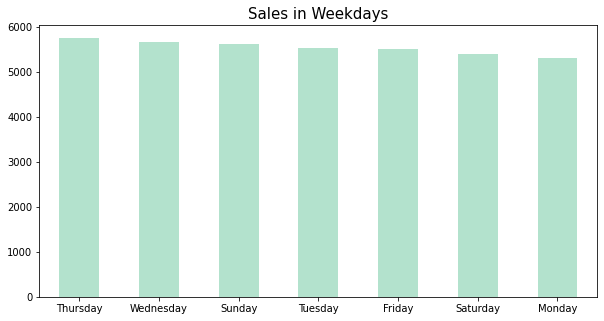

In [ ]:
plt.figure(figsize=(10, 5))
data_eda['weekday'].value_counts(sort=True).plot(kind='bar',rot=0,colormap='Pastel2')
plt.title('Sales in Weekdays', size=15)

Text(0.5, 1.0, 'Sales in Days')

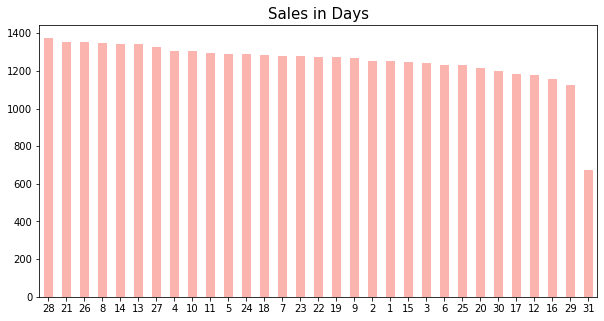

In [ ]:
plt.figure(figsize=(10, 5))
data_eda['day'].value_counts(sort=True).plot(kind='bar',rot=0,colormap='Pastel1')
plt.title('Sales in Days', size=15)

To find top 50 itmes sold

In [ ]:
df1 = pd.DataFrame(data_eda['itemDescription'].value_counts().head(50)).reset_index()
df1.columns =['itemDescription','Count']
df1.head()

,itemDescription,Count
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334


Text(0, 0.5, 'Quantity')

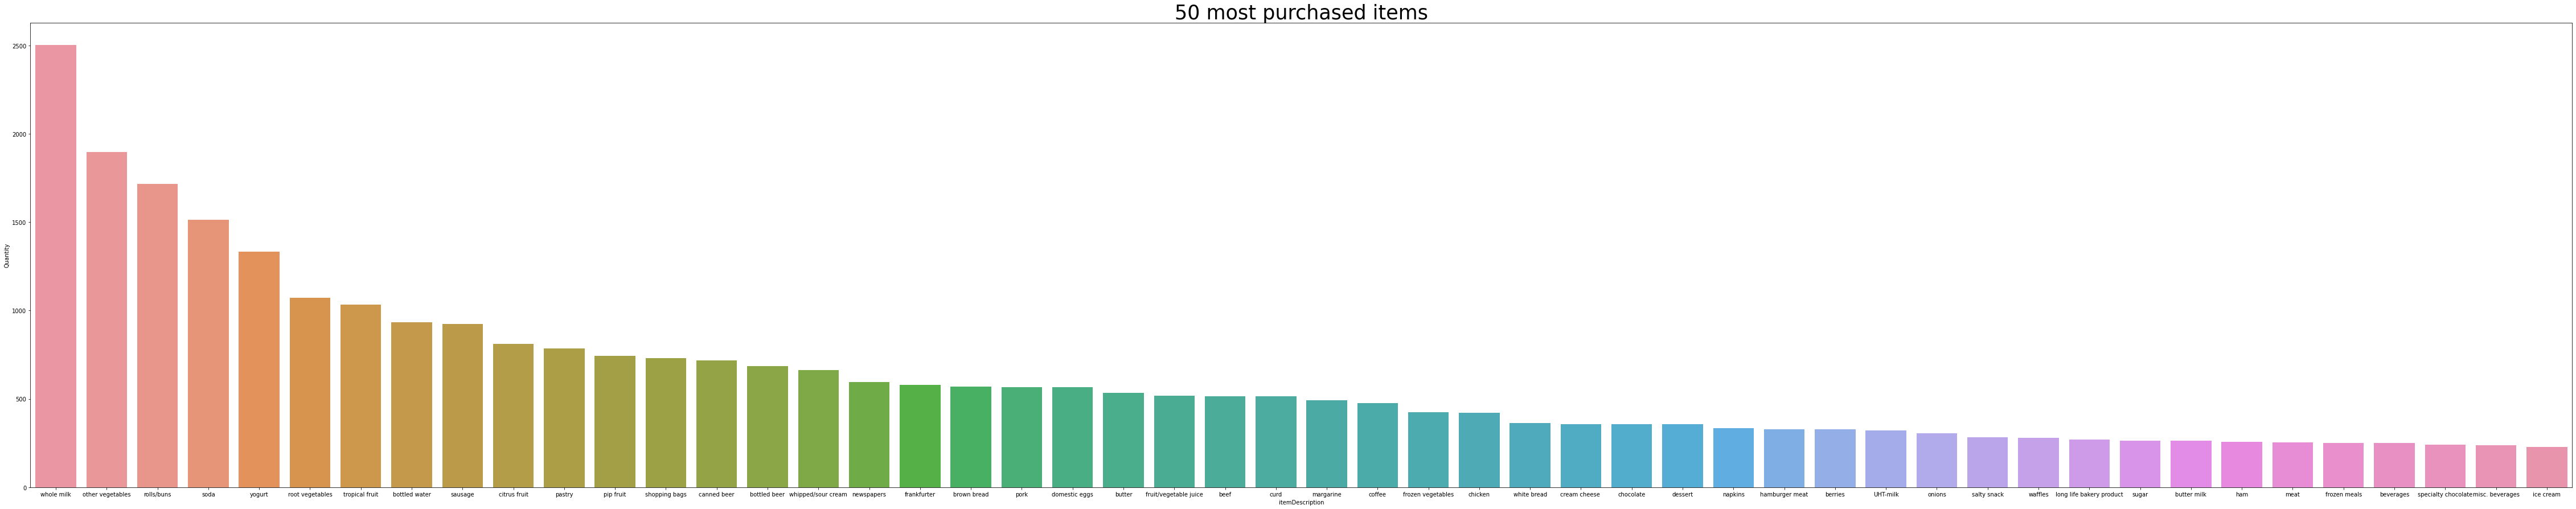

In [ ]:
plt.figure(figsize=(80, 15))
sns.barplot(x='itemDescription',y='Count', data=df1)
plt.title('50 most purchased items', size=35)
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

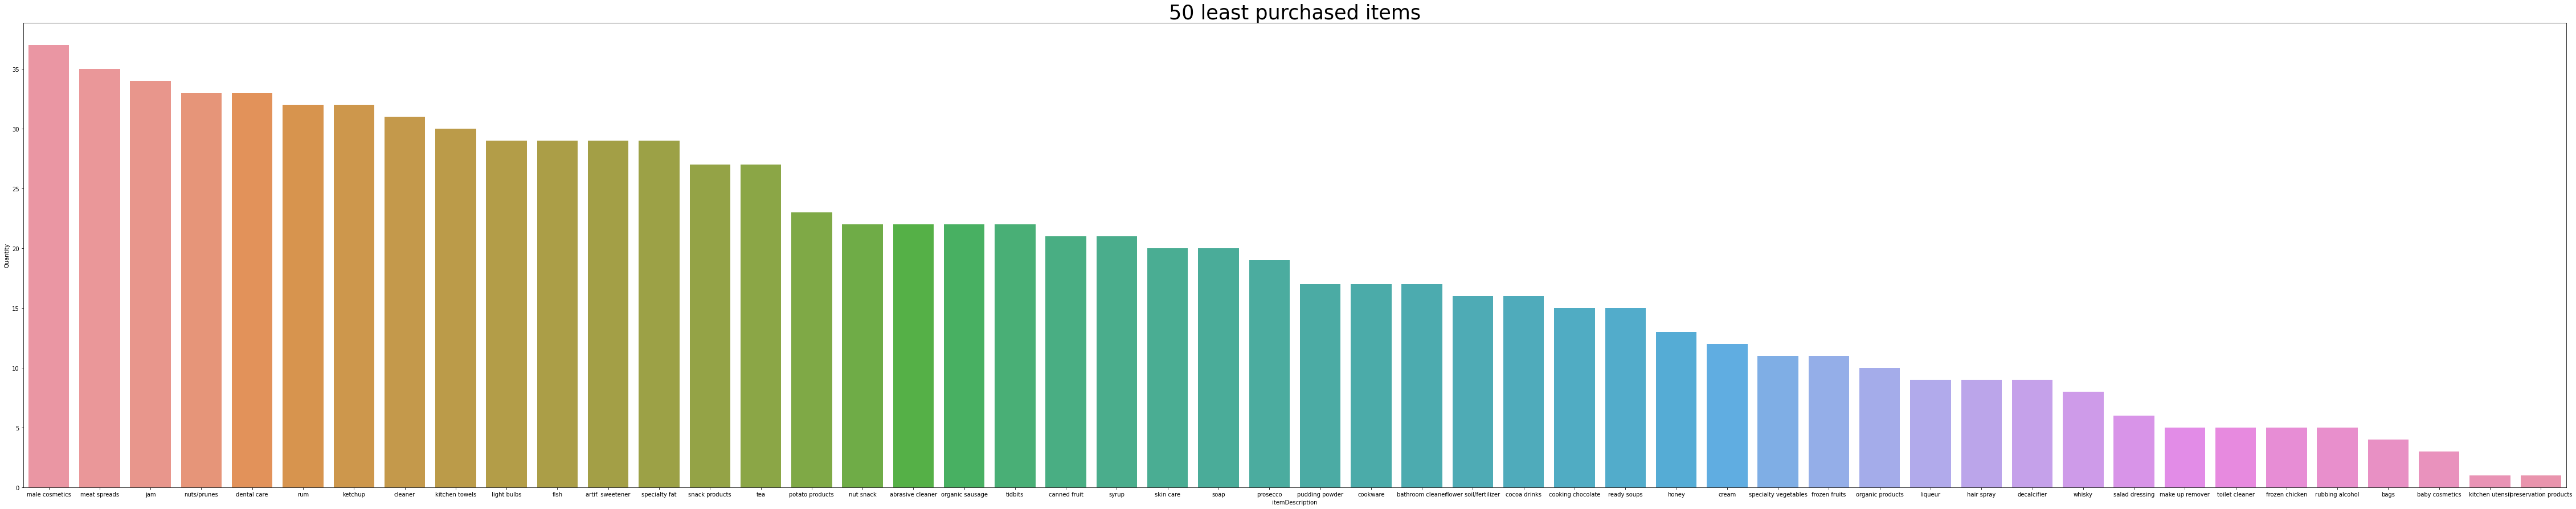

In [ ]:
df2 = pd.DataFrame(data_eda['itemDescription'].value_counts().tail(50)).reset_index()
df2.columns =['itemDescription','Count']
plt.figure(figsize=(80, 15))
sns.barplot(x='itemDescription',y='Count', data=df2)
plt.title('50 least purchased items', size=35)
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

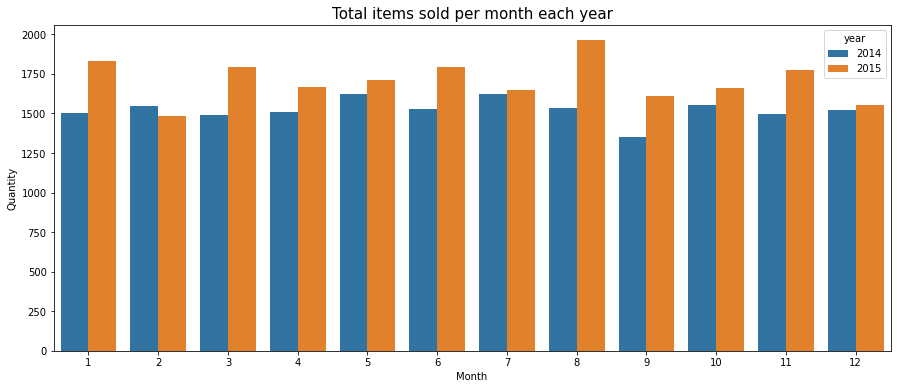

In [ ]:
#Total items sold per month each year
plt.figure(figsize=(15,6))
ax = sns.countplot(x='month', hue='year', data=data_eda)
plt.title('Total items sold per month each year', size=15)
plt.xlabel('Month')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

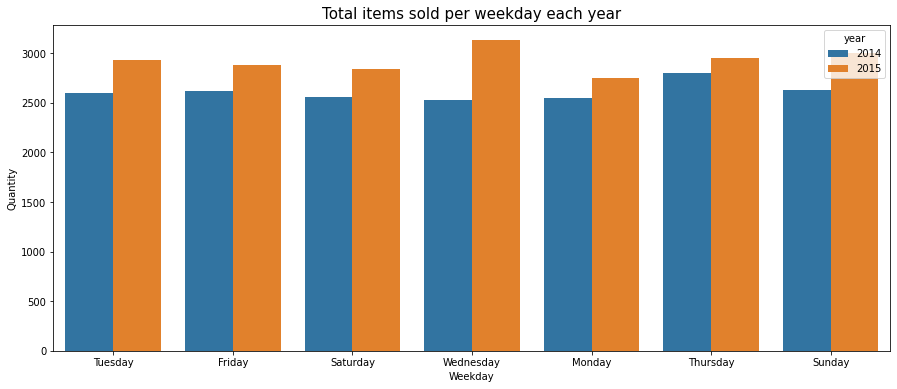

In [ ]:
#Total items sold per weekday each year
plt.figure(figsize=(15,6))
ax = sns.countplot(x='weekday', hue='year', data=data_eda)
plt.title('Total items sold per weekday each year', size=15)
plt.xlabel('Weekday')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

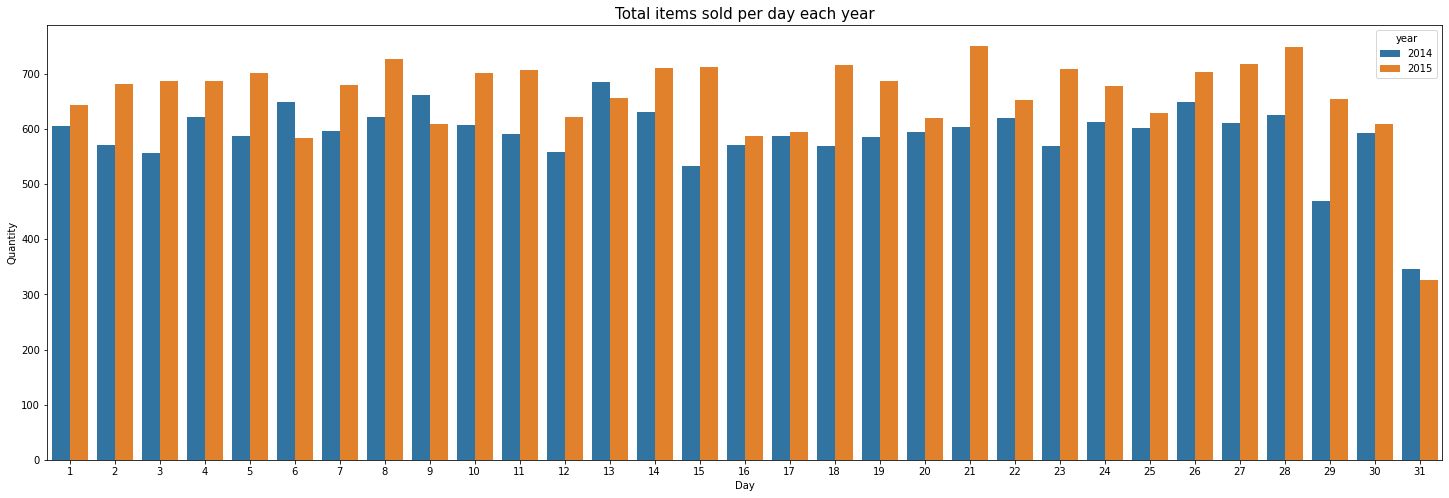

In [ ]:
#Total items sold per day each year
plt.figure(figsize=(25,8))
ax = sns.countplot(x='day', hue='year', data=data_eda)
plt.title('Total items sold per day each year', size=15)
plt.xlabel('Day')
plt.ylabel('Quantity')

In [ ]:
total_items = len(data_eda)
total_days = len(np.unique(data_eda.index.date))
total_months = len(np.unique(data_eda.index.month))
average_items = total_items / total_days
unique_items = data_eda.itemDescription.unique().size

print("Total {} items sold in {} days throughout 2 years".format(total_items, total_days))
print("With an average of {} items sold daily".format(average_items))

Total 38765 items sold in 728 days throughout 2 years
With an average of 53.24862637362637 items sold daily


Text(0, 0.5, 'Quantity Purchased')

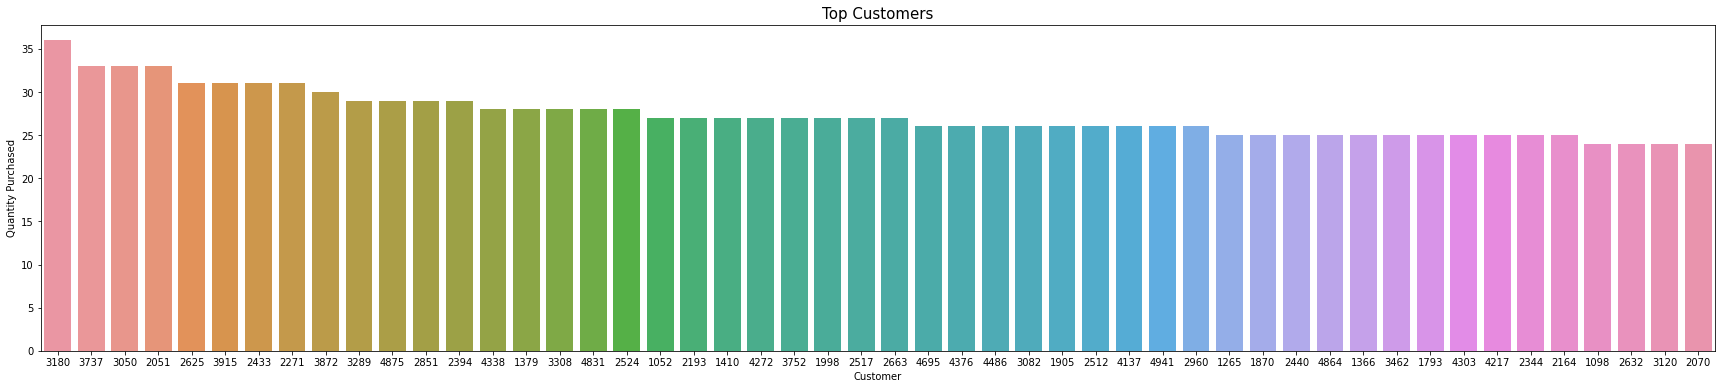

In [ ]:
#Top Customers
plt.figure(figsize=(30,6))
ax = sns.countplot(x='Member_number', data=data_eda, order=data_eda.Member_number.value_counts().iloc[:50].index)
plt.title('Top Customers', size=15)
plt.xlabel('Customer')
plt.ylabel('Quantity Purchased')

# Apriori Model

In [ ]:
user_id = input()

2051


In [ ]:
df3 = data.loc[data['Member_number'] == int(user_id)]

In [ ]:
df3

,Member_number,Date,itemDescription
2221,2051,23-07-2015,other vegetables
3441,2051,02-01-2015,photo/film
4004,2051,11-09-2015,frankfurter
4564,2051,14-11-2015,canned beer
4674,2051,20-04-2015,whole milk
5015,2051,11-09-2015,frankfurter
7598,2051,23-07-2015,beverages
7952,2051,23-07-2015,fruit/vegetable juice
8116,2051,14-11-2015,beef
8226,2051,20-04-2015,pork


In [ ]:
df3.shape

(33, 3)

In [ ]:
df3.values

array([[2051, '23-07-2015', 'other vegetables'],
       [2051, '02-01-2015', 'photo/film'],
       [2051, '11-09-2015', 'frankfurter'],
       [2051, '14-11-2015', 'canned beer'],
       [2051, '20-04-2015', 'whole milk'],
       [2051, '11-09-2015', 'frankfurter'],
       [2051, '23-07-2015', 'beverages'],
       [2051, '23-07-2015', 'fruit/vegetable juice'],
       [2051, '14-11-2015', 'beef'],
       [2051, '20-04-2015', 'pork'],
       [2051, '23-07-2015', 'prosecco'],
       [2051, '20-01-2014', 'meat'],
       [2051, '03-12-2014', 'rolls/buns'],
       [2051, '11-09-2015', 'long life bakery product'],
       [2051, '23-07-2015', 'other vegetables'],
       [2051, '02-01-2015', 'domestic eggs'],
       [2051, '11-09-2015', 'newspapers'],
       [2051, '14-11-2015', 'whole milk'],
       [2051, '20-04-2015', 'brown bread'],
       [2051, '11-09-2015', 'pip fruit'],
       [2051, '23-07-2015', 'ice cream'],
       [2051, '23-07-2015', 'soda'],
       [2051, '14-11-2015', 'coffee'],


In [ ]:
transactions = [a[1]['itemDescription'].tolist() for a in list(df3.groupby(['Date']))]

In [ ]:
transactions

[['flour', 'cream cheese '],
 ['photo/film', 'domestic eggs', 'cocoa drinks'],
 ['rolls/buns', 'other vegetables', 'newspapers'],
 ['frankfurter',
  'frankfurter',
  'long life bakery product',
  'newspapers',
  'pip fruit',
  'whipped/sour cream',
  'hygiene articles'],
 ['canned beer', 'beef', 'whole milk', 'coffee'],
 ['meat', 'rolls/buns'],
 ['whole milk', 'pork', 'brown bread', 'other vegetables'],
 ['other vegetables',
  'beverages',
  'fruit/vegetable juice',
  'prosecco',
  'other vegetables',
  'ice cream',
  'soda',
  'root vegetables']]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te = TransactionEncoder()

In [ ]:
te_ary = te.fit(transactions).transform(transactions)

In [ ]:
te.columns_

['beef',
 'beverages',
 'brown bread',
 'canned beer',
 'cocoa drinks',
 'coffee',
 'cream cheese ',
 'domestic eggs',
 'flour',
 'frankfurter',
 'fruit/vegetable juice',
 'hygiene articles',
 'ice cream',
 'long life bakery product',
 'meat',
 'newspapers',
 'other vegetables',
 'photo/film',
 'pip fruit',
 'pork',
 'prosecco',
 'rolls/buns',
 'root vegetables',
 'soda',
 'whipped/sour cream',
 'whole milk']

In [ ]:
te_ary

array([[False, False, False, False, False, False,  True, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False,  True, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True, False,
        False, False, False,  True, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
         True, False,  True, False,  True, False,  True, False, False,
         True, False, False, False, False, False,  True, False],
       [ True, False, False,  True, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, F

In [ ]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
transactions

,beef,beverages,brown bread,canned beer,cocoa drinks,coffee,cream cheese,domestic eggs,flour,frankfurter,...,other vegetables,photo/film,pip fruit,pork,prosecco,rolls/buns,root vegetables,soda,whipped/sour cream,whole milk
0,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
4,True,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,False,False,True,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
7,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,True,True,False,False


In [ ]:
#Count is the total no of transactions in each colums, and freq is the no of times *TOP variable* appeared in that column
pf = transactions.describe()
pf

,beef,beverages,brown bread,canned beer,cocoa drinks,coffee,cream cheese,domestic eggs,flour,frankfurter,...,other vegetables,photo/film,pip fruit,pork,prosecco,rolls/buns,root vegetables,soda,whipped/sour cream,whole milk
count,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,7,7,7,7,7,7,7,7,7,7,...,5,7,7,7,7,6,7,7,7,6


In [ ]:
#Count - Freq from above table - to find no of TRUE values
pf.iloc[0]-pf.iloc[3]

beef                        1
beverages                   1
brown bread                 1
canned beer                 1
cocoa drinks                1
coffee                      1
cream cheese                1
domestic eggs               1
flour                       1
frankfurter                 1
fruit/vegetable juice       1
hygiene articles            1
ice cream                   1
long life bakery product    1
meat                        1
newspapers                  2
other vegetables            3
photo/film                  1
pip fruit                   1
pork                        1
prosecco                    1
rolls/buns                  2
root vegetables             1
soda                        1
whipped/sour cream          1
whole milk                  2
dtype: object

In [ ]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False)

In [ ]:
item

,Count,Item
16,3,other vegetables
25,2,whole milk
21,2,rolls/buns
15,2,newspapers
1,1,beverages
24,1,whipped/sour cream
23,1,soda
22,1,root vegetables
20,1,prosecco
19,1,pork


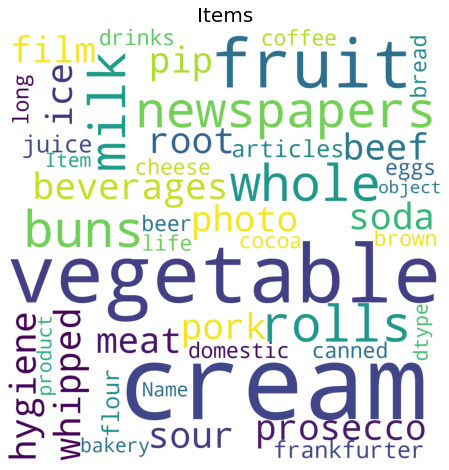

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (8, 8)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(item['Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [ ]:
freq_items = apriori(transactions, min_support=0.001, use_colnames=True)
#support = particular itemset/ total no of transactions

In [ ]:
freq_items.shape

(235, 2)

In [ ]:
freq_items.head(10)

,support,itemsets
0,0.125,(beef)
1,0.125,(beverages)
2,0.125,(brown bread)
3,0.125,(canned beer)
4,0.125,(cocoa drinks)
5,0.125,(coffee)
6,0.125,(cream cheese )
7,0.125,(domestic eggs)
8,0.125,(flour)
9,0.125,(frankfurter)


In [ ]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [ ]:
freq_items['length'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
freq_items.head(100)

,support,itemsets,length
0,0.125,(beef),1
1,0.125,(beverages),1
2,0.125,(brown bread),1
3,0.125,(canned beer),1
4,0.125,(cocoa drinks),1
...,...,...,...
95,0.125,"(beverages, other vegetables, root vegetables)",3
96,0.125,"(beverages, other vegetables, soda)",3
97,0.125,"(beverages, prosecco, root vegetables)",3
98,0.125,"(beverages, prosecco, soda)",3


In [ ]:
freq_items.tail(10)

,support,itemsets,length
225,0.125,"(other vegetables, soda, ice cream, prosecco, ...",5
226,0.125,"(fruit/vegetable juice, other vegetables, ice ...",6
227,0.125,"(fruit/vegetable juice, other vegetables, soda...",6
228,0.125,"(fruit/vegetable juice, other vegetables, soda...",6
229,0.125,"(fruit/vegetable juice, soda, ice cream, bever...",6
230,0.125,"(fruit/vegetable juice, other vegetables, soda...",6
231,0.125,"(other vegetables, soda, ice cream, beverages,...",6
232,0.125,"(newspapers, hygiene articles, pip fruit, whip...",6
233,0.125,"(fruit/vegetable juice, other vegetables, soda...",6
234,0.125,"(fruit/vegetable juice, other vegetables, soda...",7


In [ ]:
length = freq_items.iloc[-1]['length']
length

7

In [ ]:
l = freq_items.loc[freq_items['length'] == length]

In [ ]:
l

,support,itemsets,length
234,0.125,"(fruit/vegetable juice, other vegetables, soda...",7


In [ ]:
names=[]
for i in l.itemsets:
  for j in i:
    if j not in names:
      names.append(j)

In [ ]:
names

['fruit/vegetable juice',
 'other vegetables',
 'soda',
 'ice cream',
 'beverages',
 'prosecco',
 'root vegetables']

In [ ]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)

In [ ]:
rules.shape

(2662, 9)

In [ ]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(canned beer),0.125,0.125,0.125,1.0,8.0,0.109375,inf
1,(canned beer),(beef),0.125,0.125,0.125,1.0,8.0,0.109375,inf
2,(beef),(coffee),0.125,0.125,0.125,1.0,8.0,0.109375,inf
3,(coffee),(beef),0.125,0.125,0.125,1.0,8.0,0.109375,inf
4,(whole milk),(beef),0.250,0.125,0.125,0.5,4.0,0.093750,1.75
5,(beef),(whole milk),0.125,0.250,0.125,1.0,4.0,0.093750,inf
6,(beverages),(fruit/vegetable juice),0.125,0.125,0.125,1.0,8.0,0.109375,inf
7,(fruit/vegetable juice),(beverages),0.125,0.125,0.125,1.0,8.0,0.109375,inf
8,(beverages),(ice cream),0.125,0.125,0.125,1.0,8.0,0.109375,inf
9,(ice cream),(beverages),0.125,0.125,0.125,1.0,8.0,0.109375,inf
